In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [20]:
def uniformGen(a, b, m, N, seed):
    ui=list()
    x = seed
    for _ in range(18):
        x = (a*x + b)%m
        ui.append(x/m)
    for i in range(18, N):
        curr = ui[i-17]-ui[i-5]
        if(curr<0): curr = 1+curr
        ui.append(curr)
    return ui

In [229]:
def expp(x, lamda):
    if(x>0):
        return (lamda*np.exp(-1*lamda*x))
    else:
        return 0

In [21]:
meanTimes = np.array((4, 4, 2, 5, 2, 3, 2, 3, 2, 2))

In [43]:
def E10(T):
    return T[9]+max(T[3]+T[1]+T[0], max(T[7]+T[2]+T[0], T[8]+max(T[4]+T[1]+T[0], max(T[5]+T[2]+T[0], T[6]+T[2]+T[0]))))

In [246]:
def inverseLog(lam, u):
    return (-1/lam)*(np.log(1-u))

In [266]:
def monte_carlo_sim(seed, n):
    u_samples = uniformGen(1597, 1, 244944, 200000, seed)
    u_index = 1
    E_10 = list()
    T_i = list()
    for _ in range(n):
        T = list()
        for i in range(10):
            T.append(inverseLog(1/meanTimes[i], u_samples[u_index]))
            u_index+=1
        temp = E10(T)
        E_10.append(temp)
        T_i.append(T)
    print(f"Mean of E10: {np.mean(E_10)}\n")
    plt.hist(E_10, bins=100)
    plt.show()
    
    print(f"Skewness of samples is {skew(E_10)}")

    coun = 0
    for i in E_10:
        if(i>70): coun+=1
    prob = coun/n

    p = []
    for i in range(n):
        temp = 1
        for j in range(10):
            temp*=expp(T_i[i][j], 1/meanTimes[j])
        if(E_10[i]>70):
            p.append(temp)
        else:
            p.append(0)

    E_10 = np.array(E_10)
    std = np.std(E_10>70)
    
    print(f"Probability of missing deadline: {prob}")
    print(f"The standard Deviation of Probability: {std}")

Mean of E10: 18.11529270968303



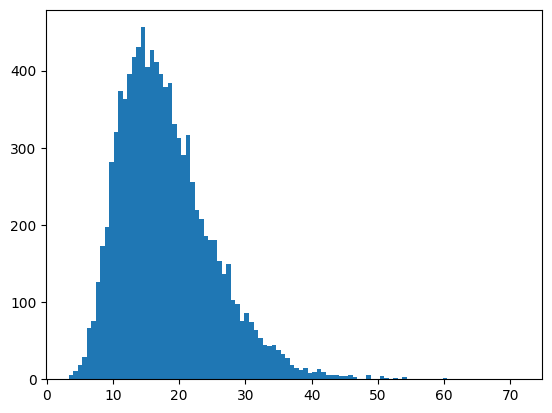

Skewness of samples is 1.0736874436242845
Probability of missing deadline: 0.0001
The standard Deviation of Probability: 0.009999499987499378


In [269]:
monte_carlo_sim(3, 10000)

In [220]:
def importance_samp_e(seed, n, k):
    u_samples = uniformGen(1597, 1, 244944, n*20, seed)
    u_index = 1
    coun = 0
    E_10 = list()
    wi = list()
    wi2 = list()
    for _ in range(n):
        T = list()
        for i in range(10):
            T.append(inverseLog(1/(k*meanTimes[i]), u_samples[u_index]))
            u_index+=1
        e = E10(T)
        f=0
        if(e>70):
            coun+=1
            f=1
        p = 1
        for i in range(10):
            temp = expp(T[i], 1/meanTimes[i])
            temp /= expp(T[i], 1/(k*meanTimes[i]))
            p*=temp
        E_10.append(f*p)
        wi.append(p)
        
    mean = np.mean(E_10)
    
    u_index = 1
    var = np.var(E_10)
    wi_2 = np.square(wi)

    n_e = n*(pow(np.mean(wi), 2))/np.mean(wi_2)
        
    print(f"Estimated probability: {mean} ({coun} E10's greater than 70)\nStandard deviation: {np.sqrt(var)}\nEstimated samples size: {n_e}")

In [258]:
importance_samp_e(8, 10000, 4)

Estimated probability: 2.8795997096149656e-05 (4664 E10's greater than 70)
Standard deviation: 0.0008570098775141869
Estimated samples size: 3.2701409738542355


In [259]:
def importance_samp_f(seed, n, k):
    u_samples = uniformGen(1597, 1, 244944, n*20, seed)
    u_index = 1
    coun = 0
    E_10 = list()
    wi = list()
    wi2 = list()
    for _ in range(n):
        T = list()
        for i in range(10):
            if(i == 0 or i == 1 or i == 3 or i == 9):
                T.append(inverseLog(1/(k*meanTimes[i]), u_samples[u_index]))
            else:
                T.append(inverseLog(1/meanTimes[i], u_samples[u_index]))
            u_index+=1
        e = E10(T)
        f=0
        if(e>70):
            coun+=1
            f=1
        p = 1
        for i in range(10):
            temp = expp(T[i], 1/meanTimes[i])
            if(i == 0 or i == 1 or i == 3 or i == 9):
                temp /= expp(T[i], 1/(k*meanTimes[i]))
            else:
                temp = 1
            p*=temp
        E_10.append(f*p)
        wi.append(p)
        
    mean = np.mean(E_10)
    
    u_index = 1
    var = np.var(E_10)
    wi_2 = np.square(wi)

    n_e = n*(pow(np.mean(wi), 2))/np.mean(wi_2)
    l = mean-(2.58*np.sqrt(var)/np.sqrt(n))
    r = mean+(2.58*np.sqrt(var)/np.sqrt(n))
        
    print(f"\nFor k={k}\nEstimated probability: {mean} ({coun} E10's greater than 70)\nStandard deviation: {np.sqrt(var)}\nEstimated sample size: {n_e}")
    print(f"99% confidence interval: [{l}, {r}]")

In [260]:
k = np.array((3, 4, 5))

In [261]:
for ki in k:
    importance_samp_f(8, 10000, ki)


For k=3
Estimated probability: 3.048886299558089e-05 (1417 E10's greater than 70)
Standard deviation: 0.00017205565913890302
Estimated sample size: 916.9513316644061
99% confidence interval: [2.6049826989797193e-05, 3.492789900136459e-05]

For k=4
Estimated probability: 2.8265738481174406e-05 (3142 E10's greater than 70)
Standard deviation: 0.00014025235992752138
Estimated sample size: 327.46655911205283
99% confidence interval: [2.4647227595044356e-05, 3.1884249367304456e-05]

For k=5
Estimated probability: 3.3822954208965744e-05 (4793 E10's greater than 70)
Standard deviation: 0.00017824268628843982
Estimated sample size: 141.04805829751248
99% confidence interval: [2.9224292902723997e-05, 3.842161551520749e-05]
